### Diwali Sales Analysis in Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #Visualization.

In [2]:
#Import csv file. df->Dataframe.
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
#Columns name
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
#check for null values.
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
#Drop NA Values and Columns.
df.drop(['Status','unnamed1'], axis=1,inplace=True)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
#Filling Null Values with 0 
df['Amount'] = df['Amount'].fillna(0)

In [12]:
df['Amount'] = df['Amount'].astype(int)

In [13]:
df['Amount'].tail()

11246    370
11247    367
11248    213
11249    206
11250    188
Name: Amount, dtype: int32

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# Exploratory Data Analysis

## Gender

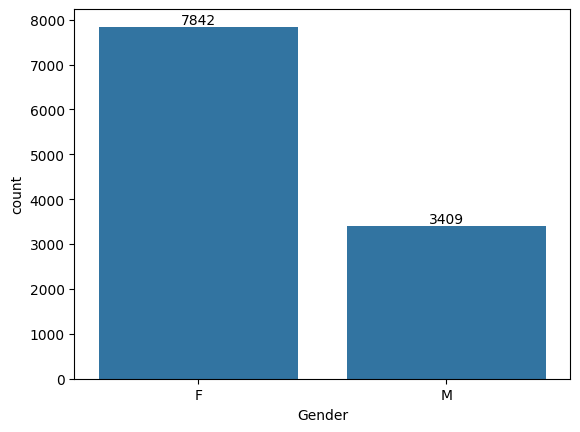

In [15]:
# plotting for bar charts for gender & it's count

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

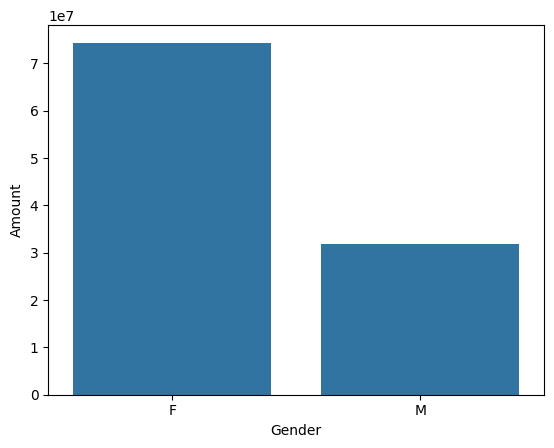

In [16]:
# Plotting a bar chart for gender VS total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount' ,ascending = False)

sns.barplot(x = 'Gender', y = 'Amount' , data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power females are greater than men.

### Age

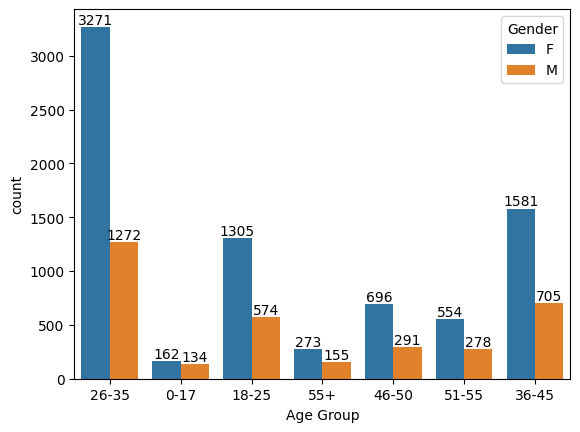

In [17]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

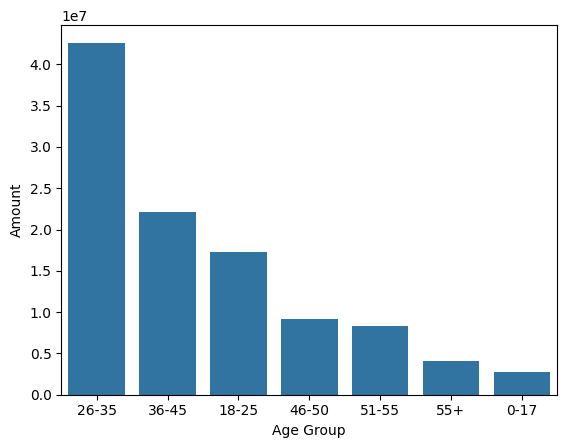

In [18]:
# Total Amount VS age Group.

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 years female.*

### State

<Axes: xlabel='State', ylabel='Orders'>

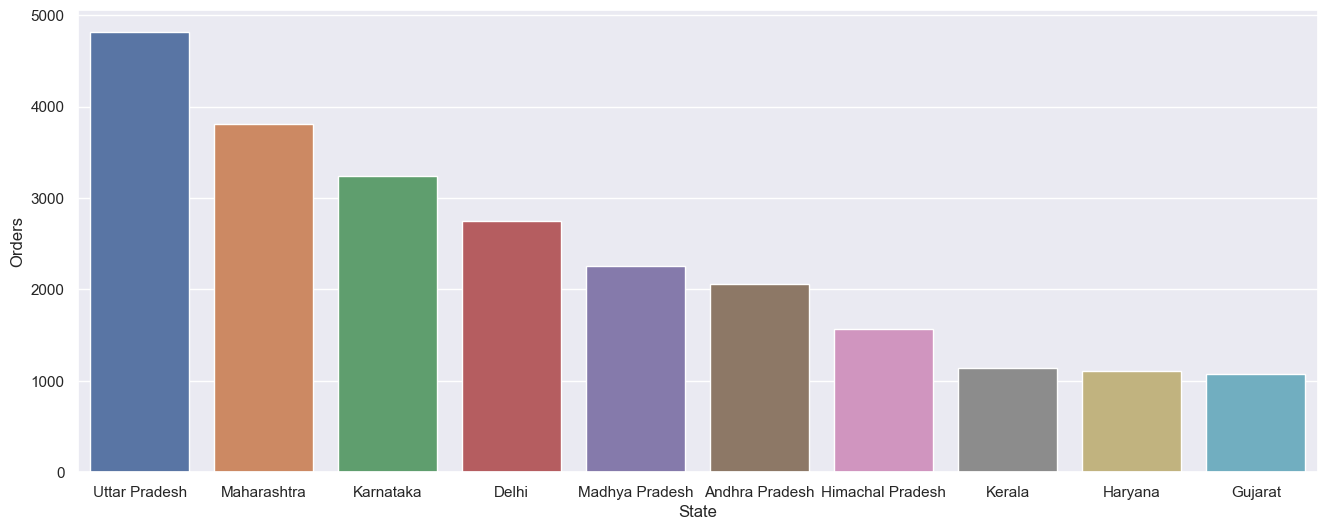

In [19]:
# Total Number of orders from top 10 states.

sales_states = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,6)})

sns.barplot(data = sales_states,x= 'State', y='Orders',hue='State')

<Axes: xlabel='State', ylabel='Amount'>

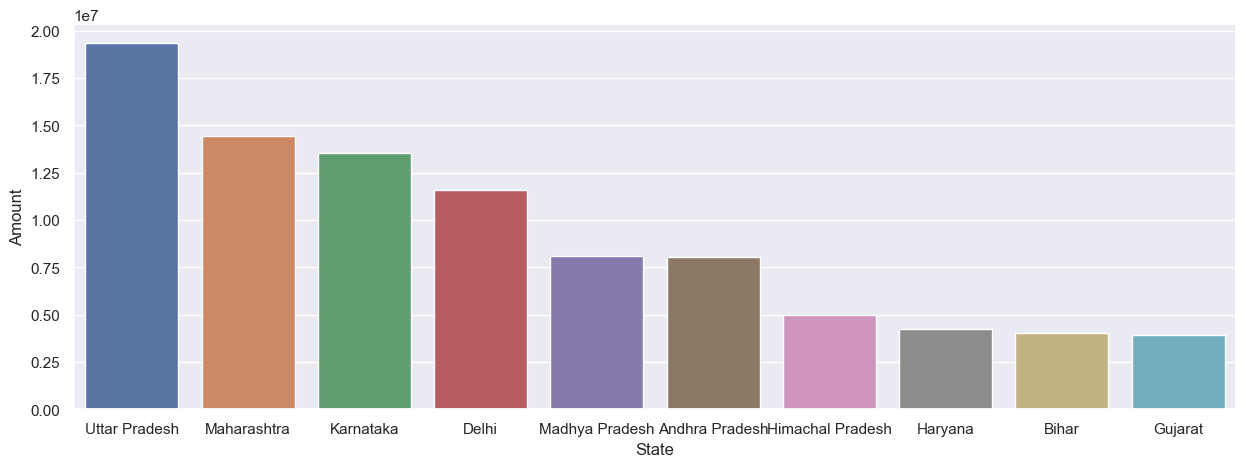

In [20]:
sales_states = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_states, x ='State', y= 'Amount',hue = 'State')


<Axes: xlabel='Marital_Status', ylabel='Amount'>

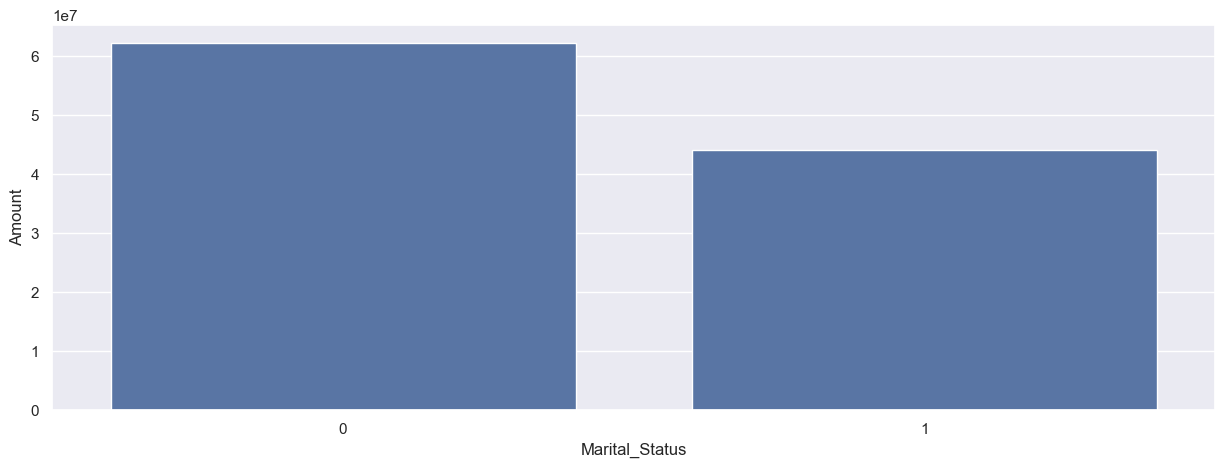

In [32]:
sales_states = df.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_states, x ='Marital_Status', y= 'Amount')


*From above graphs we can see that most of the buyers are married(Women) and they have high purchasing power.*

### Occupation

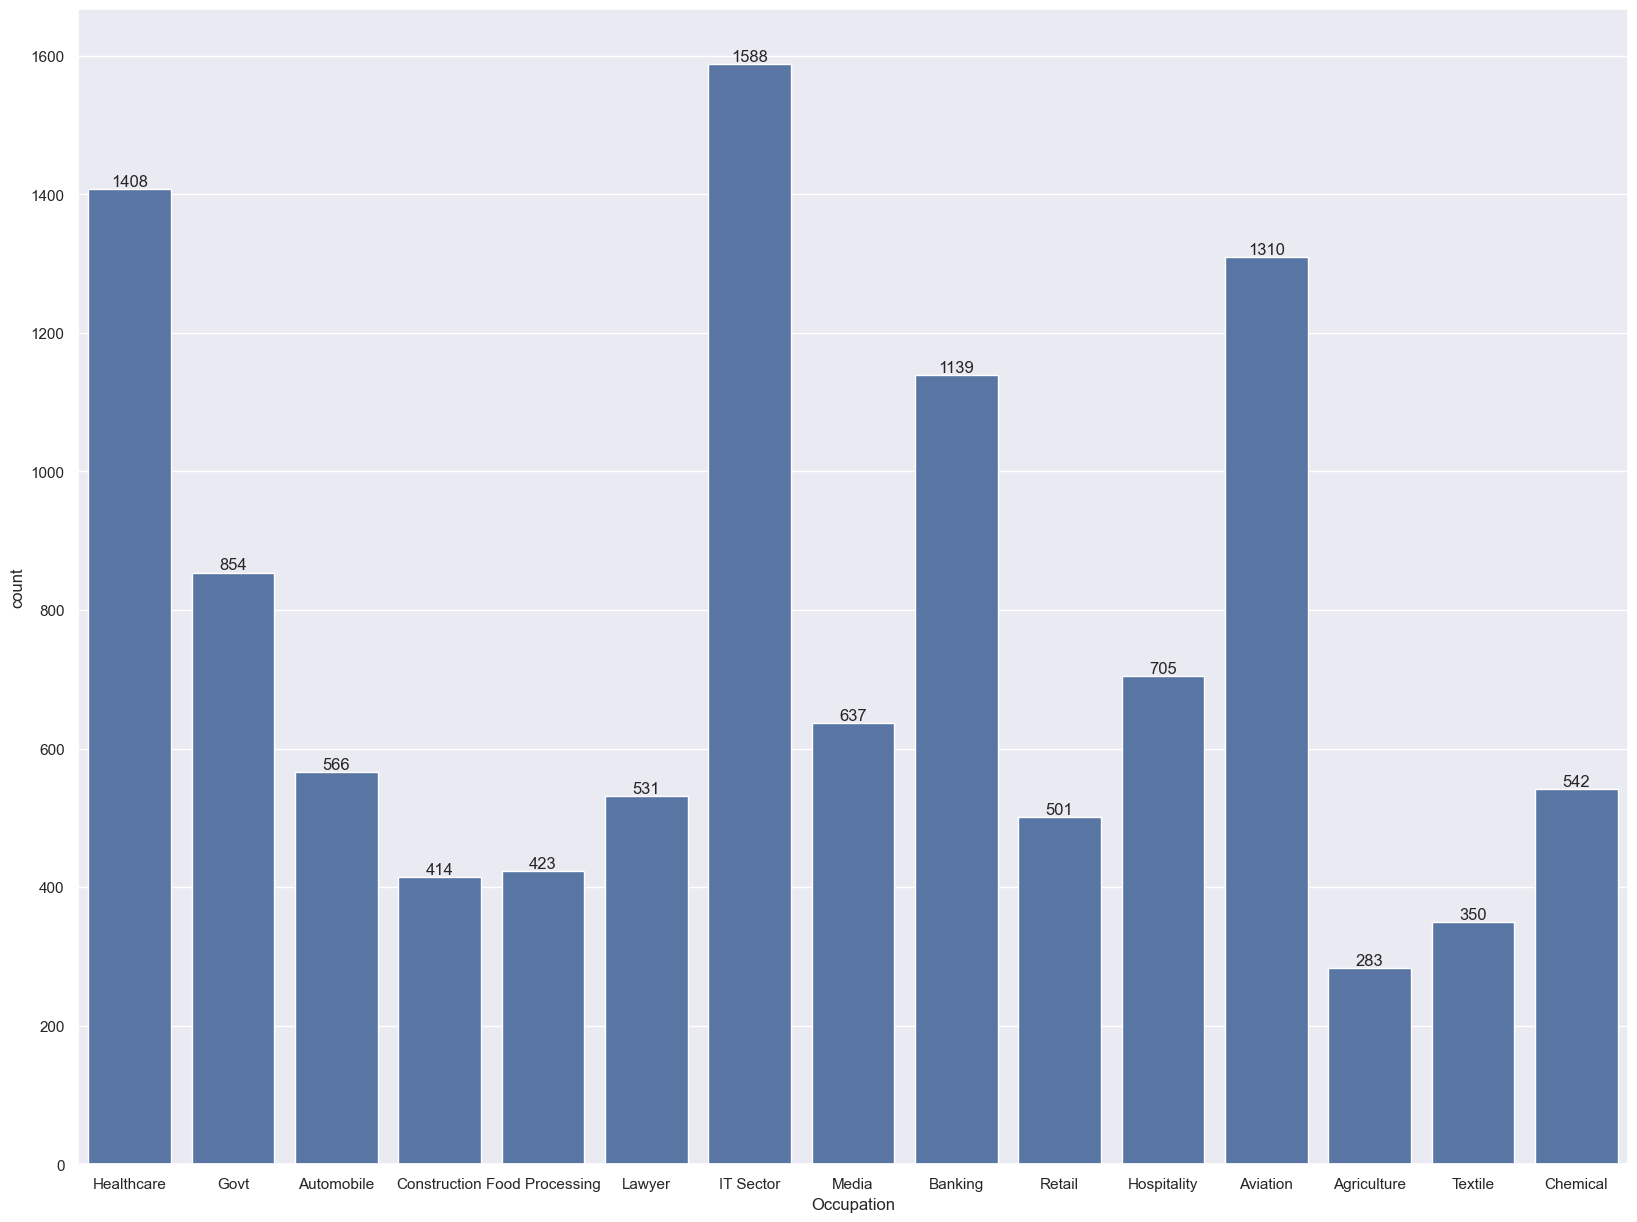

In [22]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

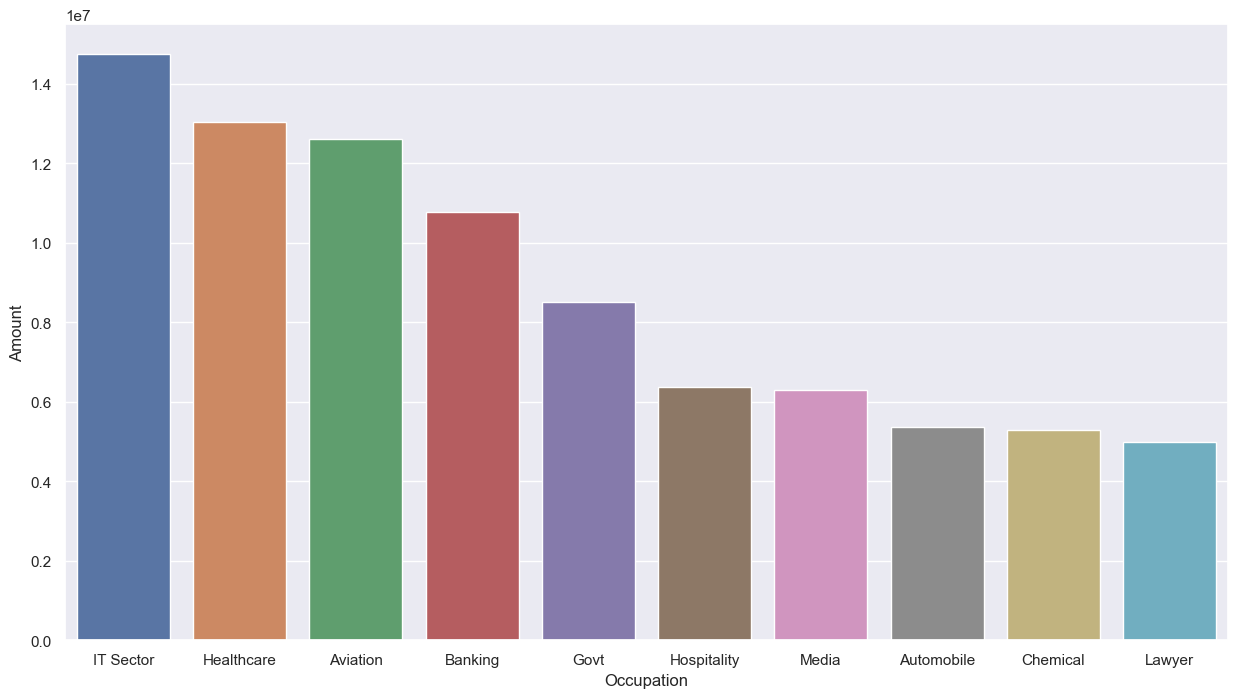

In [23]:
sns.set(rc={'figure.figsize':(15,8)})
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(data = sales_occupation, x = 'Occupation' , y = 'Amount',hue = 'Occupation')

*From ablove we can see that most of the buyers are working in IT Sector & HealthCare Sector & Aviation sector*

### Product Category

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

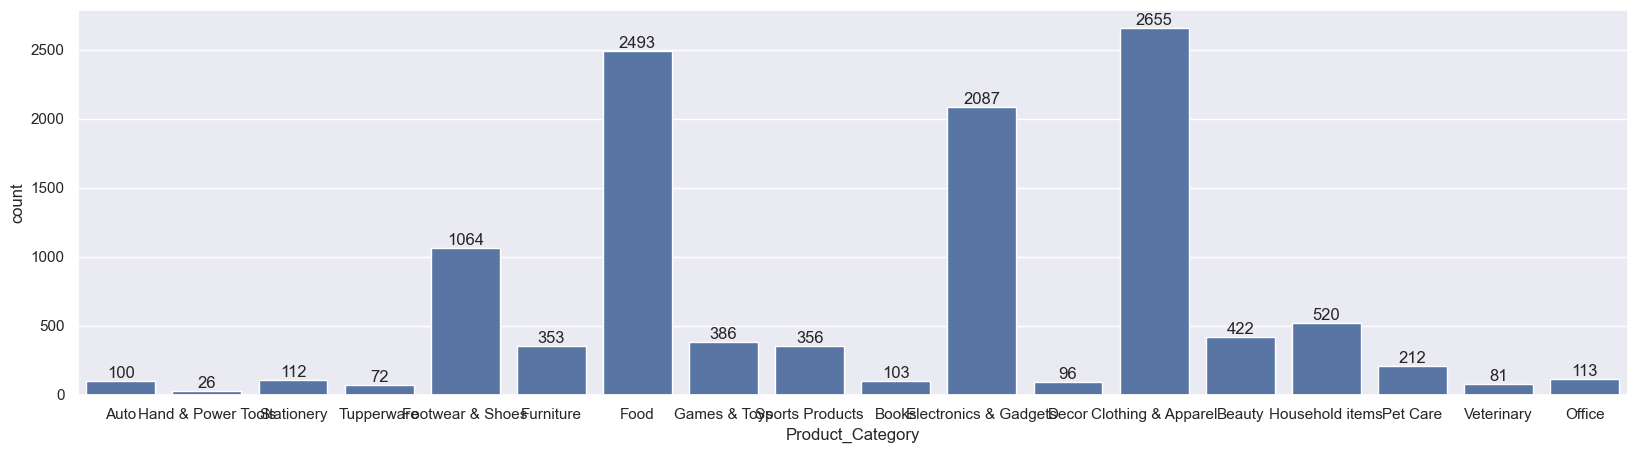

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df,x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

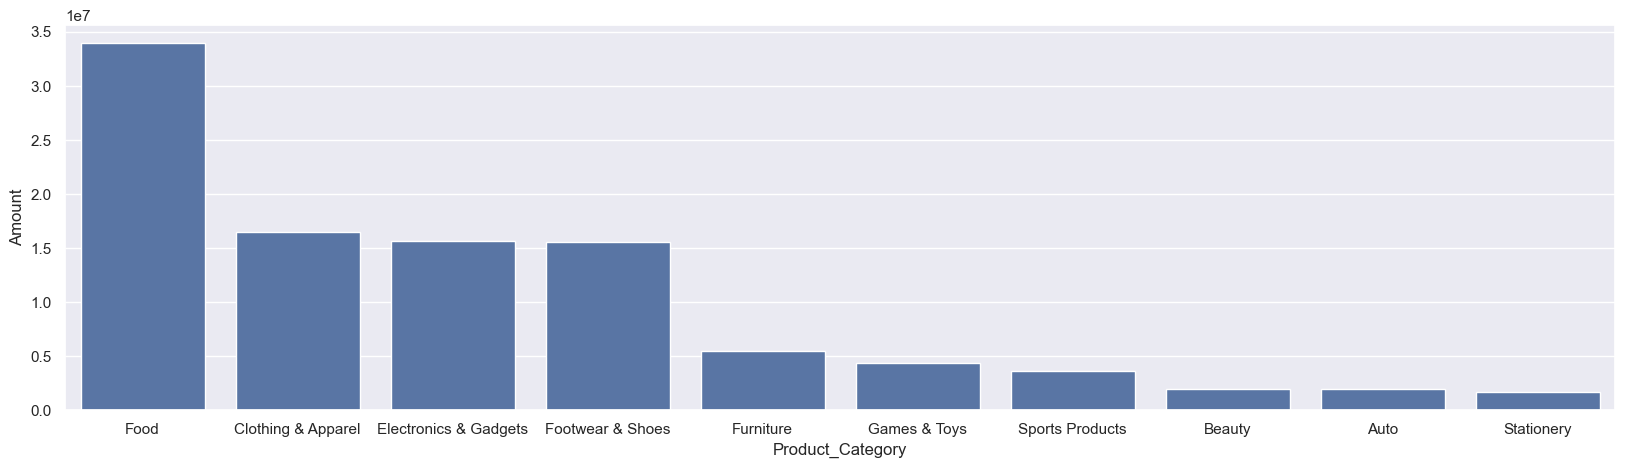

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
sales_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.barplot(data = sales_category, x = 'Product_Category' , y = 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

*From above graphs we can see also that top product count of a Clothing and Electronics is high but sales is less*
*This product needs promotions*

<Axes: xlabel='Product_ID', ylabel='Amount'>

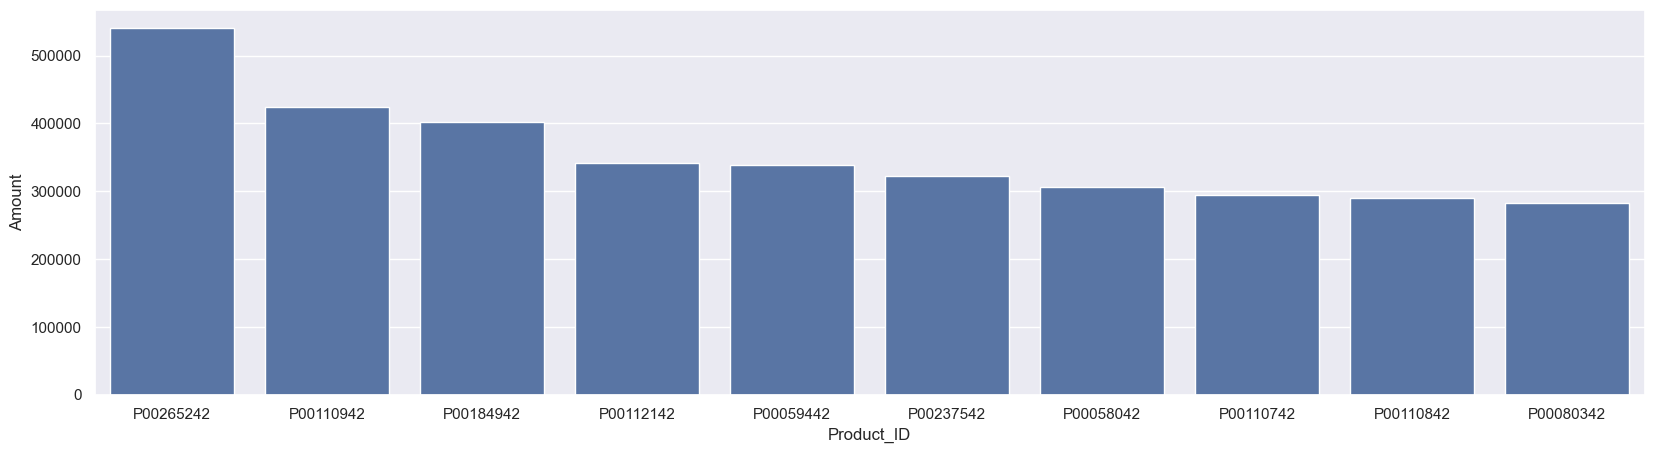

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
sales_category = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.barplot(data = sales_category, x = 'Product_ID' , y = 'Amount')

<Axes: xlabel='Product_ID'>

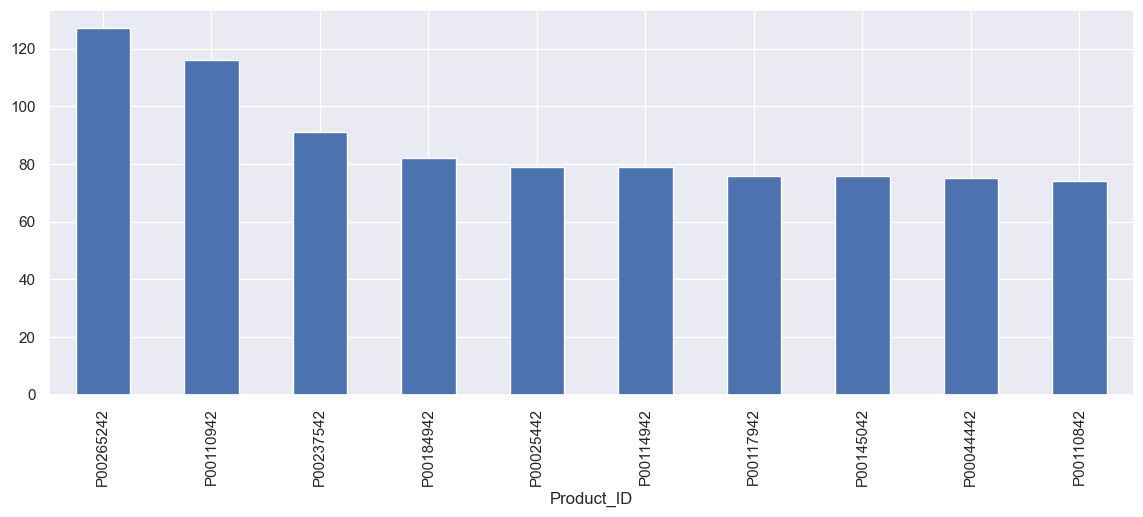

In [28]:
# Top 10 most sold product (same thing as above)
sns.set(rc={'figure.figsize':(14,5)})
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
                                                  

### Conclusion

*Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*